In [2]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [71]:
aa = pd.read_csv('./data/train_0825.csv',encoding='cp949')
aa.head()

,building_number,date_time,temperature,windspeed,humidity,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,...,solar_yes,ess_yes,sy_ey,sy_en,date,sensory_temperature,km_cluster,weekday_hour_mean,hour_mean,hour_std
0,1,2022-06-01 0:00,18.6,0.9,42.0,1085.28,Other Buildings,110634.0,39570.0,0.0,...,0,0,0,0,2022-06-01,20.751584,0,1774.744615,1706.318118,446.882767
1,1,2022-06-01 1:00,18.0,1.1,45.0,1047.36,Other Buildings,110634.0,39570.0,0.0,...,0,0,0,0,2022-06-01,20.008954,0,1687.347692,1622.620235,439.662704
2,1,2022-06-01 2:00,17.7,1.5,45.0,974.88,Other Buildings,110634.0,39570.0,0.0,...,0,0,0,0,2022-06-01,19.476910,0,1571.483077,1506.971294,412.071906
3,1,2022-06-01 3:00,16.7,1.4,48.0,953.76,Other Buildings,110634.0,39570.0,0.0,...,0,0,0,0,2022-06-01,18.487958,0,1522.153846,1437.365647,391.205981
4,1,2022-06-01 4:00,18.4,2.8,43.0,986.40,Other Buildings,110634.0,39570.0,0.0,...,0,0,0,0,2022-06-01,19.751534,0,1506.793846,1447.321412,381.099697


In [3]:
train = pd.read_csv('./data/train_0825.csv',encoding='cp949')

train.solar_yes = train.solar_yes.astype(int)
train.ess_yes = train.ess_yes.astype(int)
train.sy_ey = train.sy_ey.astype(int)
train.sy_en = train.sy_en.astype(int)


# train.drop(['building_number','date_time','building_type'])

train['hour_sin'] = np.sin(2 * np.pi * (train['hour']+1)/24.0)
train['hour_cos'] = np.cos(2 * np.pi * (train['hour']+1)/24.0)

train_6 = train[train['month']==6]
train_78 = train[train['month']!=6]
train_6['day_sin'] = np.sin(2 * np.pi * train['day']/30)
train_6['day_cos'] = np.cos(2 * np.pi * train['day']/30)

train_78['day_sin'] = np.sin(2 * np.pi * train['day']/31)
train_78['day_cos'] = np.cos(2 * np.pi * train['day']/31)
train = pd.concat([train_6,train_78])

train['weekday_sin'] = np.sin(2 * np.pi * (train['weekday']+1)/7)
train['weekday_cos'] = np.cos(2 * np.pi * (train['weekday']+1)/7)




train['work_time'] = 0
train['low_day'] = 0
train['particular'] = 0
trains = [train[train.building_number == num] for num in range(1,101,1)]

## cluster 0
for num in [10,13]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
    
    trains[num-1] = temp_df
for num in [14]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
    temp_df['particular'] = temp_df['hour'].isin([0,8,12,18]).astype(int)
    trains[num-1] = temp_df
for num in [15]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([4,5,6,7,8])).astype(int)
    trains[num-1] = temp_df

## cluster 1
for num in [17,18,19,21,22,69,70,72]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [26,28,76,78,80,82,83,84]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [71]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)*(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = (((temp_df['weekday']==5)&(temp_df['hour'].isin([10,11,13,14])))
                               |((temp_df['weekday'].isin([0,1,2,3,4,5]))&(temp_df['hour'].isin([0,1,2,3,4])))).astype(int)
    trains[num-1] = temp_df
for num in [53]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=4)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [55]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=19)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [50]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [56]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = ((temp_df['weekday']==2)&(temp_df['hour']==16)).astype(int)
    trains[num-1] = temp_df
for num in [60]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [20,23]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [58,59,77]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [27,74,79]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [57]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [24,25]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [29,30]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [31]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [50]:
    temp_df = trains[num-1]
    temp_df['particular'] = (((temp_df['weekday']==2)&(temp_df['hour']==16))|((temp_df['weekday']==2)&(temp_df['hour']==16))).astype(int)
    trains[num-1] = temp_df
for num in [1]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [8]:
    temp_df = trains[num-1]
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [12]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [88,90]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    trains[num-1] = temp_df
for num in [86]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    temp_df['particular'] = ((temp_df['month']==6)&(temp_df['day']==26)).astype(int)
    trains[num-1] = temp_df
for num in [87,89,91]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=9)).astype(int)
    trains[num-1] = temp_df
for num in [4]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    trains[num-1] = temp_df
for num in [7,16]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=5)).astype(int)
    trains[num-1] = temp_df
for num in [9]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=23)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [11]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [36]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    trains[num-1] = temp_df
for num in [75]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=15)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [92]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=6)).astype(int)
    trains[num-1] = temp_df

## cluster 2
for num in [32,33,34]:
    temp_df = trains[num-1]
    temp_df = temp_df[temp_df.month>=7]
    trains[num-1] = temp_df
for num in [61,65,66,67,68]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df
for num in [62,63,64]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df

## cluster 3
for num in [93,94,96,97,98,100]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=6)&(temp_df['hour']<=22)).astype(int)
    trains[num-1] = temp_df
for num in [42,43,44]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=20)).astype(int)
    trains[num-1] = temp_df
for num in [2,85,99]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [38,40,95]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=20)).astype(int)
    trains[num-1] = temp_df
for num in [3,81]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [6,41]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=22)).astype(int)
    trains[num-1] = temp_df
for num in [37,39]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [35]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df
for num in [54]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=5)&(temp_df['hour']<=20)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==0).astype(int)
    trains[num-1] = temp_df
for num in [5]:
    temp_df = trains[num-1]
    temp_df['particular'] = (((temp_df['weekday']==4)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==5)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==6)&(temp_df['hour'].isin([8,9,10,11,12,13,14,15,16,17,18])))).astype(int)
    trains[num-1] = temp_df
    

df = pd.concat(trains, ignore_index=True)
df = df.drop(['date_time','hour','date','day','weekday','pcs_capacity','ma_dis_5','sensory_temperature'], axis=1)

df['total_area'] = df['total_area'].map(lambda x:np.log(x) if x > 0 else 0)
df['cooling_area'] = df['cooling_area'].map(lambda x:np.log(x) if x > 0 else 0)
df['solar_power_capacity'] = df['solar_power_capacity'].map(lambda x:np.log(x) if x > 0 else 0)
df['ess_capacity'] = df['ess_capacity'].map(lambda x:np.log(x) if x > 0 else 0)

df_0 = df[df.km_cluster==0]
df_1 = df[df.km_cluster==1]
df_2 = df[df.km_cluster==2]
df_3 = df[df.km_cluster==3]





X_0 = df_0.drop('power_consumption', axis=1)
y_0 = df_0['power_consumption']
y_0_log = np.log(y_0)
X_0_train = X_0.drop('km_cluster', axis=1)

X_1 = df_1.drop('power_consumption', axis=1)
y_1 = df_1['power_consumption']
y_1_log = np.log(y_1)
X_1_train = X_1.drop('km_cluster', axis=1)

X_2 = df_2.drop('power_consumption', axis=1)
y_2 = df_2['power_consumption']
y_2_log = np.log(y_2)
X_2_train = X_2.drop('km_cluster', axis=1)

X_3 = df_3.drop('power_consumption', axis=1)
y_3 = df_3['power_consumption']
y_3_log = np.log(y_3)
X_3_train = X_3.drop('km_cluster', axis=1)



# # Standard Scaling for continuous data
con_li = ['hour_sin', 'hour_cos', 'day_sin','day_cos', 'weekday_sin','weekday_cos', 'temperature', 'windspeed', 
'humidity', 'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity', 'discomfort', 'temperature_3', 
'discomfort_3', 'ma_dis_3', 'CDH', 'temperature_mean', 'discomfort_mean', 'CDH_mean',
         'weekday_hour_mean','hour_mean','hour_std']


cat_li = ['building_number', 'holiday','air_yes','solar_yes',
         'ess_yes','sy_ey','sy_en','low_day','particular']

T = [X_0_train,X_1_train,X_2_train,X_3_train]

for train in T :


    for col in con_li :
        if train[col].std() == 0:
            train = train.drop(col, axis=1)
        else :
            train[col] = (train[col] - train[col].mean())/train[col].std()

    for col in cat_li :
        if train[col].nunique() == 1:        
            train = train.drop(col,axis=1)


X_0_train.building_type = X_0_train.building_type.astype('category')
X_0_train = pd.get_dummies(X_0_train)
X_1_train.building_type = X_1_train.building_type.astype('category')
X_1_train = pd.get_dummies(X_1_train)
X_2_train.building_type = X_2_train.building_type.astype('category')
X_2_train = pd.get_dummies(X_2_train)
X_3_train.building_type = X_3_train.building_type.astype('category')
X_3_train = pd.get_dummies(X_3_train)

test = pd.read_csv('./data/test_0825.csv',encoding='cp949')
        
test.solar_yes = test.solar_yes.astype(int)
test.ess_yes = test.ess_yes.astype(int)
test.sy_ey = test.sy_ey.astype(int)
test.sy_en = test.sy_en.astype(int)

test['hour_sin'] = np.sin(2 * np.pi * (test['hour']+1)/24.0)
test['hour_cos'] = np.cos(2 * np.pi * (test['hour']+1)/24.0)

test['day_sin'] = np.sin(2 * np.pi * test['day']/31)
test['day_cos'] = np.cos(2 * np.pi * test['day']/31)

test['weekday_sin'] = np.sin(2 * np.pi * (test['weekday']+1)/7)
test['weekday_cos'] = np.cos(2 * np.pi * (test['weekday']+1)/7)


test['work_time'] = 0
test['low_day'] = 0
test['particular'] = 0
tests = [test[test.building_number == num] for num in range(1,101,1)]

## cluster 0
for num in [10,13]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
    tests[num-1] = temp_df
for num in [14]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
    temp_df['particular'] = temp_df['hour'].isin([0,8,12,18]).astype(int)
    tests[num-1] = temp_df
for num in [15]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([4,5,6,7,8])).astype(int)
    tests[num-1] = temp_df

## cluster 1
for num in [17,18,19,21,22,69,70,72]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [26,28,76,78,80,82,83,84]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [71]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)*(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = (((temp_df['weekday']==5)&(temp_df['hour'].isin([10,11,13,14])))
                               |((temp_df['weekday'].isin([0,1,2,3,4,5]))&(temp_df['hour'].isin([0,1,2,3,4])))).astype(int)
    tests[num-1] = temp_df
for num in [53]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=4)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [55]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=19)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [50]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [56]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = ((temp_df['weekday']==2)&(temp_df['hour']==16)).astype(int)
    tests[num-1] = temp_df
for num in [60]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [20,23]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [58,59,77]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [27,74,79]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [57]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [24,25]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [29,30]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [31]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [50]:
    temp_df = tests[num-1]
    temp_df['particular'] = (((temp_df['weekday']==2)&(temp_df['hour']==16))|((temp_df['weekday']==2)&(temp_df['hour']==16))).astype(int)
    tests[num-1] = temp_df
for num in [1]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [8]:
    temp_df = tests[num-1]
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [12]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [88,90]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    tests[num-1] = temp_df
for num in [86]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    temp_df['particular'] = ((temp_df['month']==6)&(temp_df['day']==26)).astype(int)
    tests[num-1] = temp_df
for num in [87,89,91]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=9)).astype(int)
    tests[num-1] = temp_df
for num in [4]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    tests[num-1] = temp_df
for num in [7,16]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=5)).astype(int)
    tests[num-1] = temp_df
for num in [9]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=23)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [11]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [36]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    tests[num-1] = temp_df
for num in [75]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=15)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [92]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=6)).astype(int)
    tests[num-1] = temp_df

## cluster 2
for num in [32,33,34]:
    temp_df = tests[num-1]
    temp_df = temp_df[temp_df.month>=7]
    tests[num-1] = temp_df
for num in [61,65,66,67,68]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df
for num in [62,63,64]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df

## cluster 3
for num in [93,94,96,97,98,100]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=6)&(temp_df['hour']<=22)).astype(int)
    tests[num-1] = temp_df
for num in [42,43,44]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=20)).astype(int)
    tests[num-1] = temp_df
for num in [2,85,99]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [38,40,95]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=20)).astype(int)
    tests[num-1] = temp_df
for num in [3,81]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [6,41]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=22)).astype(int)
    tests[num-1] = temp_df
for num in [37,39]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [35]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df
for num in [54]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=5)&(temp_df['hour']<=20)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==0).astype(int)
    tests[num-1] = temp_df
for num in [5]:
    temp_df = tests[num-1]
    temp_df['particular'] = (((temp_df['weekday']==4)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==5)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==6)&(temp_df['hour'].isin([8,9,10,11,12,13,14,15,16,17,18])))).astype(int)
    tests[num-1] = temp_df
    

df = pd.concat(tests, ignore_index=True)
df = df.drop(['date_time','hour','date','day','weekday','pcs_capacity','ma_dis_5','sensory_temperature'], axis=1)


df['total_area'] = df['total_area'].map(lambda x:np.log(x) if x > 0 else 0)
df['cooling_area'] = df['cooling_area'].map(lambda x:np.log(x) if x > 0 else 0)
df['solar_power_capacity'] = df['solar_power_capacity'].map(lambda x:np.log(x) if x > 0 else 0)
df['ess_capacity'] = df['ess_capacity'].map(lambda x:np.log(x) if x > 0 else 0)

df_0 = df[df.km_cluster==0]
df_1 = df[df.km_cluster==1]
df_2 = df[df.km_cluster==2]
df_3 = df[df.km_cluster==3]

X_0_test = df_0.drop('km_cluster', axis=1)
X_1_test = df_1.drop('km_cluster', axis=1)
X_2_test = df_2.drop('km_cluster', axis=1)
X_3_test = df_3.drop('km_cluster', axis=1)


# Standard Scaling for continuous data
con_li = ['hour_sin', 'hour_cos', 'day_sin','day_cos', 'weekday_sin','weekday_cos', 'temperature', 'windspeed', 
'humidity', 'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity', 'discomfort', 'temperature_3', 
'discomfort_3', 'ma_dis_3', 'CDH', 'temperature_mean', 'discomfort_mean', 'CDH_mean',
         'weekday_hour_mean','hour_mean','hour_std']


cat_li = ['building_number','holiday','air_yes','solar_yes',
         'ess_yes','sy_ey','sy_en','low_day','particular']

T = [X_0_test, X_1_test, X_2_test, X_3_test]

for test in T :
    for col in con_li :
        if test[col].std() == 0:
            test = test.drop(col, axis=1)
        else :
            test[col] = (test[col] - test[col].mean())/test[col].std()

    for col in cat_li :
        if test[col].nunique() == 1:        
            test = test.drop(col,axis=1)
    test = pd.get_dummies(test)


X_0_test.building_type = X_0_test.building_type.astype('category')
X_0_test = pd.get_dummies(X_0_test)
X_1_test.building_type = X_1_test.building_type.astype('category')
X_1_test = pd.get_dummies(X_1_test)
X_2_test.building_type = X_2_test.building_type.astype('category')
X_2_test = pd.get_dummies(X_2_test)
X_3_test.building_type = X_3_test.building_type.astype('category')
X_3_test = pd.get_dummies(X_3_test)

(08.27 15:30) 변수중요도 0, 하위 4개 추가 삭제 

In [4]:
del_0 = ['air_yes','sy_ey',
         'building_type_Discount Mart', 
         'low_day', 'temperature', 'windspeed', 'discomfort_3',
        'building_type_Other Buildings','solar_yes','ess_yes','windspeed']
del_1 = ['particular','building_type_Department Store and Outlet','low_day',
        'solar_yes','sy_en','sy_ey','ess_yes', 'temperature', 'temperature_3', 'discomfort_3', 'windspeed',
        'air_yes','ess_capacity','building_type_Hotel and Resort',
        'solar_power_capacity','windspeed']
del_2 = ['low_day','particular','building_type_Apartment','work_time', 'temperature_3', 'windspeed', 'discomfort_3',
        'solar_yes','sy_en','sy_ey','ess_yes','air_yes',
        'ess_capacity','solar_power_capacity','building_type_Data Center', 'temperature',
        'discomfort_3','windspeed']
del_3 = ['building_type_Knowledge Industry Center','particular','ess_yes',
        'solar_yes','air_yes','building_type_Public', 'temperature_3', 'work_time', 'discomfort_3', 'particular',
        'temperature_3','temperature','discomfort_3','sy_ey']

col_0 = list(X_0_train.columns)
col_1 = list(X_1_train.columns)
col_2 = list(X_2_train.columns)
col_3 = list(X_3_train.columns)

col_0 = [x for x in col_0 if x not in del_0]
col_1 = [x for x in col_1 if x not in del_1]
col_2 = [x for x in col_2 if x not in del_2]
col_3 = [x for x in col_3 if x not in del_3]

X_0_train = X_0_train[col_0]
X_1_train = X_1_train[col_1]
X_2_train = X_2_train[col_2]
X_3_train = X_3_train[col_3]

X_0_test = X_0_test[col_0]
X_1_test = X_1_test[col_1]
X_2_test = X_2_test[col_2]
X_3_test = X_3_test[col_3]

def smape(true, pred):
    v = 2 * abs(pred - true) / ((abs(pred) + abs(true)))
    result = np.mean(v) * 100
    return result

In [8]:
col_3

['building_number',
 'windspeed',
 'humidity',
 'total_area',
 'cooling_area',
 'solar_power_capacity',
 'ess_capacity',
 'month',
 'discomfort',
 'holiday',
 'ma_dis_3',
 'CDH',
 'temperature_mean',
 'discomfort_mean',
 'CDH_mean',
 'sy_en',
 'weekday_hour_mean',
 'hour_mean',
 'hour_std',
 'hour_sin',
 'hour_cos',
 'day_sin',
 'day_cos',
 'weekday_sin',
 'weekday_cos',
 'low_day',
 'building_type_Commercial',
 'building_type_Hospital']

In [44]:
train_0 = X_0_train.copy()
train_0['power_consumption'] = y_0_log

train_1 = X_1_train.copy()
train_1['power_consumption'] = y_1_log

train_2 = X_2_train.copy()
train_2['power_consumption'] = y_2_log

train_3 = X_3_train.copy()
train_3['power_consumption'] = y_3_log

test_0 = X_0_test.copy()
test_1 = X_1_test.copy()
test_2 = X_2_test.copy()
test_3 = X_3_test.copy()

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

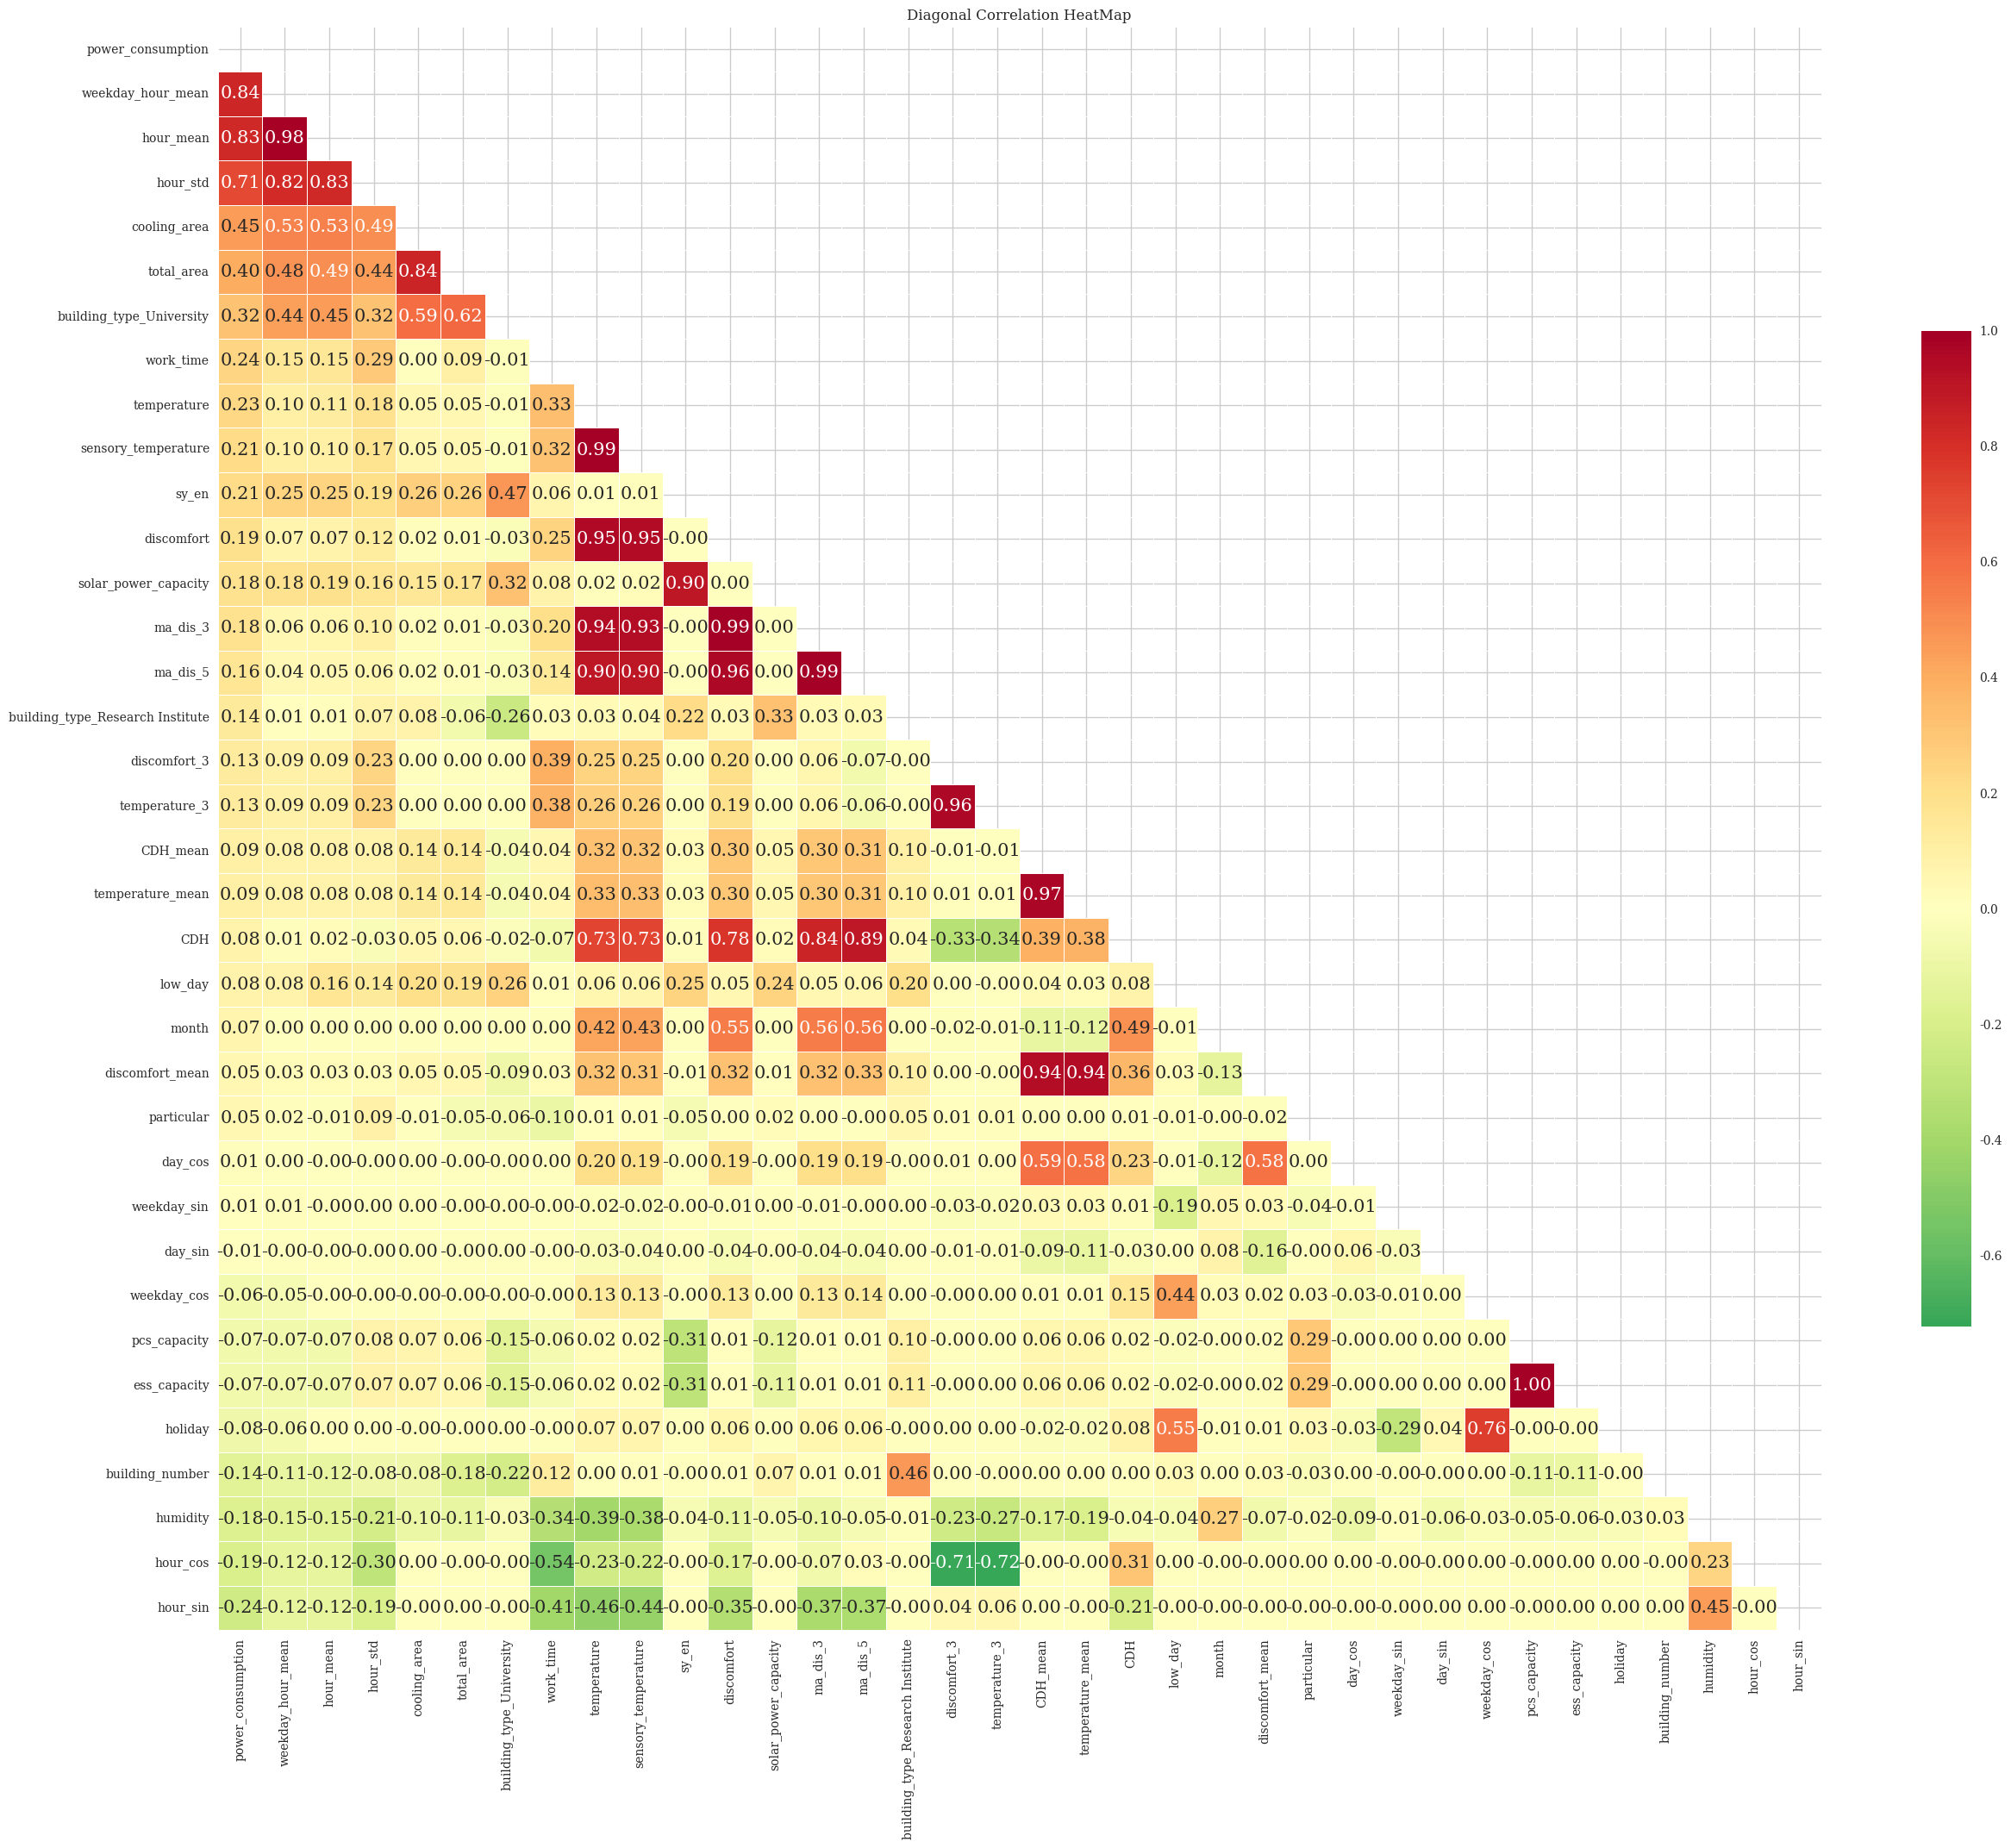

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='DejaVu Serif')
plt.rc('font', size=15)
plt.rc('axes', unicode_minus=False)


corr_matrix = train_0.corr()
corr_matrix = corr_matrix.sort_values(by = 'power_consumption', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(30, 30))
corr = train_0.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

상관관계 매우 높은 sensory_temparature, ma_dis_5, pcs_capacity 삭제 (위에서 작업함)

In [4]:
train_0 = X_0_train.copy()
train_0['power_consumption'] = y_0_log
# pycaret 설정
exp0 = setup(data=train_0, target='power_consumption')
exp0.add_metric('smape','SMAPE',smape,greater_is_better=False)

# 모델 학습 및 비교
best_model = compare_models(sort='SMAPE')
print(best_model)

,Description,Value
0,Session id,5941
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(79560, 34)"
4,Transformed data shape,"(79560, 34)"
5,Transformed train set shape,"(55692, 34)"
6,Transformed test set shape,"(23868, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE,TT (Sec)
et,Extra Trees Regressor,0.0436,0.0065,0.0808,0.9890,0.0100,0.0060,0.5976,4.3090
rf,Random Forest Regressor,0.0505,0.0087,0.0930,0.9855,0.0115,0.0069,0.6903,9.2420
lightgbm,Light Gradient Boosting Machine,0.0574,0.0080,0.0896,0.9865,0.0110,0.0078,0.7806,0.1940
dt,Decision Tree Regressor,0.0688,0.0173,0.1316,0.9709,0.0162,0.0094,0.9399,0.2060
gbr,Gradient Boosting Regressor,0.0723,0.0148,0.1216,0.9752,0.0150,0.0099,0.9877,2.4500
knn,K Neighbors Regressor,0.0814,0.0167,0.1293,0.9719,0.0159,0.0112,1.1151,0.2720
ada,AdaBoost Regressor,0.2124,0.0643,0.2536,0.8921,0.0304,0.0284,2.8745,1.3490
lr,Linear Regression,0.2816,0.1230,0.3506,0.7938,0.0411,0.0377,3.7426,0.4290
br,Bayesian Ridge,0.2816,0.1230,0.3506,0.7938,0.0411,0.0377,3.7428,0.0420
ridge,Ridge Regression,0.2817,0.1230,0.3507,0.7937,0.0411,0.0377,3.7448,0.0460


ExtraTreesRegressor(n_jobs=-1, random_state=5941)


모든 클러스터 기준

1등 ET

2 or 3등 RF, LGBM

따라서 두가지 예측 후 제출 예정

1. ET 단일모델

2. ET, RF, LGBM 앙상블

# 1. ET 단일모델

In [48]:
cat_li = ['building_number','holiday','sy_en','particular']
exp0 = setup(data=train_0, target='power_consumption', 
             train_size = len(train_0)-train_0.building_number.nunique()*168,
            categorical_features=cat_li)
            
exp0.add_metric('smape','SMAPE',smape,greater_is_better=False)

model_0 = create_model('et')

,Description,Value
0,Session id,1397
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(79560, 30)"
4,Transformed data shape,"(79560, 30)"
5,Transformed train set shape,"(73008, 30)"
6,Transformed test set shape,"(6552, 30)"
7,Ordinal features,3
8,Numeric features,25
9,Categorical features,4


,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE
Fold,,,,,,,
0,0.0385,0.0051,0.0717,0.9912,0.0089,0.0053,0.5282
1,0.0368,0.0047,0.0686,0.9920,0.0085,0.0051,0.5046
2,0.0351,0.0042,0.0645,0.9930,0.0080,0.0048,0.4805
3,0.0372,0.0050,0.0710,0.9914,0.0088,0.0051,0.5108
4,0.0371,0.0050,0.0707,0.9916,0.0088,0.0051,0.5079
5,0.0379,0.0049,0.0698,0.9919,0.0086,0.0052,0.5185
6,0.0374,0.0051,0.0716,0.9915,0.0090,0.0052,0.5143
7,0.0379,0.0052,0.0722,0.9913,0.0090,0.0052,0.5194
8,0.0367,0.0052,0.0718,0.9917,0.0089,0.0051,0.5043


In [ ]:
# tune_0 = tune_model(model_0)

In [49]:
final_best = finalize_model(model_0)
pred = predict_model(final_best, test_0)
test_0['answer_et'] = np.exp(np.array(pred['prediction_label']))

In [5]:

exp1 = setup(data=train_1, target='power_consumption')
exp1.add_metric('smape','SMAPE',smape,greater_is_better=False)

# 모델 학습 및 비교
best_model = compare_models(sort='SMAPE')
print(best_model)

,Description,Value
0,Session id,1071
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(32640, 26)"
4,Transformed data shape,"(32640, 26)"
5,Transformed train set shape,"(22848, 26)"
6,Transformed test set shape,"(9792, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE,TT (Sec)
et,Extra Trees Regressor,0.0494,0.0079,0.0888,0.9859,0.0111,0.0071,0.7036,2.2530
rf,Random Forest Regressor,0.0547,0.0103,0.1014,0.9816,0.0125,0.0078,0.7741,2.8720
lightgbm,Light Gradient Boosting Machine,0.0580,0.0084,0.0914,0.9850,0.0114,0.0082,0.8193,0.0720
gbr,Gradient Boosting Regressor,0.0687,0.0134,0.1154,0.9761,0.0142,0.0097,0.9663,0.8400
dt,Decision Tree Regressor,0.0748,0.0198,0.1406,0.9646,0.0174,0.0106,1.0625,0.0670
knn,K Neighbors Regressor,0.0803,0.0190,0.1376,0.9661,0.0168,0.0113,1.1253,0.0590
ada,AdaBoost Regressor,0.1380,0.0340,0.1842,0.9393,0.0221,0.0189,1.8967,0.2290
ridge,Ridge Regression,0.1578,0.0447,0.2114,0.9201,0.0264,0.0224,2.2272,0.0400
lr,Linear Regression,0.1578,0.0447,0.2114,0.9201,0.0264,0.0224,2.2272,0.0890
br,Bayesian Ridge,0.1578,0.0447,0.2114,0.9201,0.0264,0.0224,2.2273,0.0340


ExtraTreesRegressor(n_jobs=-1, random_state=1071)


In [50]:
cat_li = ['building_number','holiday']
exp1 = setup(data=train_1, target='power_consumption', 
             train_size = len(train_1)-train_1.building_number.nunique()*168,
            categorical_features=cat_li)
exp1.add_metric('smape','SMAPE',smape,greater_is_better=False)

model_1 = create_model('et')

,Description,Value
0,Session id,6194
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(32640, 23)"
4,Transformed data shape,"(32640, 38)"
5,Transformed train set shape,"(29952, 38)"
6,Transformed test set shape,"(2688, 38)"
7,Ordinal features,1
8,Numeric features,20
9,Categorical features,2


,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE
Fold,,,,,,,
0,0.0458,0.0072,0.0846,0.9870,0.0106,0.0066,0.6549
1,0.0438,0.0055,0.0742,0.9904,0.0093,0.0063,0.6270
2,0.0457,0.0064,0.0803,0.9884,0.0102,0.0065,0.6526
3,0.0435,0.0052,0.0719,0.9909,0.0090,0.0062,0.6203
4,0.0422,0.0056,0.0747,0.9898,0.0093,0.0060,0.6001
5,0.0421,0.0050,0.0711,0.9913,0.0090,0.0060,0.6007
6,0.0431,0.0063,0.0797,0.9887,0.0100,0.0062,0.6138
7,0.0442,0.0068,0.0822,0.9882,0.0103,0.0063,0.6318
8,0.0449,0.0066,0.0814,0.9881,0.0102,0.0064,0.6429


In [6]:
# tune_1 = tune_model(model_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE
Fold,,,,,,,
0,0.1609,0.0443,0.2105,0.9213,0.0265,0.0229,2.2749
1,0.1596,0.0474,0.2177,0.9166,0.0274,0.0227,2.2530
2,0.1606,0.0487,0.2206,0.9126,0.0275,0.0227,2.2532
3,0.1609,0.0467,0.2162,0.9168,0.0270,0.0228,2.2602
4,0.1617,0.0484,0.2200,0.9135,0.0275,0.0230,2.2802
5,0.1618,0.0459,0.2142,0.9179,0.0269,0.0230,2.2792
6,0.1543,0.0403,0.2008,0.9277,0.0253,0.0220,2.1807
7,0.1622,0.0473,0.2175,0.9151,0.0275,0.0232,2.2995
8,0.1587,0.0452,0.2125,0.9174,0.0265,0.0224,2.2275


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
final_best = finalize_model(model_1)
pred = predict_model(final_best, test_1)
test_1['answer_et'] = np.exp(np.array(pred['prediction_label']))

In [11]:
exp0 = setup(data=train_2, target='power_consumption')
exp2.add_metric('smape','SMAPE',smape,greater_is_better=False)

# 모델 학습 및 비교
best_model = compare_models(sort='SMAPE')
print(best_model)

,Description,Value
0,Session id,7717
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(24360, 24)"
4,Transformed data shape,"(24360, 24)"
5,Transformed train set shape,"(17052, 24)"
6,Transformed test set shape,"(7308, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE,TT (Sec)
et,Extra Trees Regressor,0.0239,0.0018,0.0418,0.9980,0.0054,0.0035,0.3463,0.7850
lightgbm,Light Gradient Boosting Machine,0.0261,0.0017,0.0417,0.9980,0.0054,0.0038,0.3752,0.0770
rf,Random Forest Regressor,0.0268,0.0021,0.0457,0.9976,0.0059,0.0039,0.3884,1.6360
gbr,Gradient Boosting Regressor,0.0399,0.0035,0.0590,0.9960,0.0076,0.0057,0.5733,0.5200
dt,Decision Tree Regressor,0.0396,0.0049,0.0699,0.9943,0.0089,0.0057,0.5735,0.0560
knn,K Neighbors Regressor,0.0596,0.0091,0.0952,0.9895,0.0120,0.0086,0.8549,0.0600
ada,AdaBoost Regressor,0.0918,0.0145,0.1204,0.9832,0.0152,0.0130,1.2950,0.2340
ridge,Ridge Regression,0.2075,0.0728,0.2698,0.9157,0.0337,0.0292,2.9163,0.0300
lr,Linear Regression,0.2075,0.0728,0.2698,0.9157,0.0337,0.0292,2.9163,1.3220
br,Bayesian Ridge,0.2076,0.0728,0.2698,0.9157,0.0337,0.0292,2.9172,0.0300


ExtraTreesRegressor(n_jobs=-1, random_state=7717)


In [52]:
cat_li = ['building_number','holiday']
exp2 = setup(data=train_2, target='power_consumption', 
             train_size = len(train_2)-train_2.building_number.nunique()*168,
            categorical_features=cat_li)
exp2.add_metric('smape','SMAPE',smape,greater_is_better=False)

model_2 = create_model('et')

,Description,Value
0,Session id,1636
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(24360, 22)"
4,Transformed data shape,"(24360, 34)"
5,Transformed train set shape,"(22176, 34)"
6,Transformed test set shape,"(2184, 34)"
7,Ordinal features,1
8,Numeric features,19
9,Categorical features,2


,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE
Fold,,,,,,,
0,0.0189,0.0010,0.0315,0.9988,0.0040,0.0027,0.2723
1,0.0187,0.0011,0.0325,0.9988,0.0041,0.0027,0.2697
2,0.0201,0.0012,0.0347,0.9986,0.0045,0.0029,0.2903
3,0.0190,0.0013,0.0359,0.9985,0.0048,0.0028,0.2783
4,0.0197,0.0013,0.0356,0.9985,0.0046,0.0029,0.2858
5,0.0189,0.0016,0.0396,0.9983,0.0050,0.0027,0.2739
6,0.0189,0.0012,0.0351,0.9985,0.0045,0.0027,0.2721
7,0.0198,0.0012,0.0352,0.9986,0.0046,0.0029,0.2889
8,0.0189,0.0010,0.0316,0.9988,0.0040,0.0027,0.2737


In [53]:
final_best = finalize_model(model_2)
pred = predict_model(final_best, test_2)
test_2['answer_et'] = np.exp(np.array(pred['prediction_label']))

In [12]:
exp3 = setup(data=train_3, target='power_consumption')
exp3.add_metric('smape','SMAPE',smape,greater_is_better=False)

# 모델 학습 및 비교
best_model = compare_models(sort='SMAPE')
print(best_model)

,Description,Value
0,Session id,5061
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(65280, 31)"
4,Transformed data shape,"(65280, 31)"
5,Transformed train set shape,"(45696, 31)"
6,Transformed test set shape,"(19584, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE,TT (Sec)
et,Extra Trees Regressor,0.0306,0.0032,0.0564,0.9908,0.0069,0.0042,0.4161,2.7950
rf,Random Forest Regressor,0.0357,0.0043,0.0656,0.9876,0.0080,0.0049,0.4846,6.0670
lightgbm,Light Gradient Boosting Machine,0.0404,0.0041,0.0638,0.9883,0.0078,0.0055,0.5470,0.1200
dt,Decision Tree Regressor,0.0489,0.0086,0.0926,0.9753,0.0112,0.0066,0.6624,0.1280
gbr,Gradient Boosting Regressor,0.0528,0.0074,0.0859,0.9787,0.0105,0.0071,0.7138,1.5080
knn,K Neighbors Regressor,0.0605,0.0097,0.0986,0.9720,0.0120,0.0083,0.8271,0.1330
ridge,Ridge Regression,0.1348,0.0332,0.1822,0.9045,0.0217,0.0182,1.8118,0.0350
br,Bayesian Ridge,0.1348,0.0332,0.1822,0.9045,0.0217,0.0182,1.8118,0.0320
lr,Linear Regression,0.1348,0.0332,0.1822,0.9045,0.0217,0.0182,1.8118,0.0410
ada,AdaBoost Regressor,0.1526,0.0354,0.1881,0.8982,0.0220,0.0201,2.0245,0.6620


ExtraTreesRegressor(n_jobs=-1, random_state=5061)


In [54]:
cat_li = ['building_number','holiday']
exp3 = setup(data=train_3, target='power_consumption', 
             train_size = len(train_3)-train_3.building_number.nunique()*168,
            categorical_features=cat_li)
exp3.add_metric('smape','SMAPE',smape,greater_is_better=False)

model_3 = create_model('et')

,Description,Value
0,Session id,7492
1,Target,power_consumption
2,Target type,Regression
3,Original data shape,"(65280, 29)"
4,Transformed data shape,"(65280, 29)"
5,Transformed train set shape,"(59904, 29)"
6,Transformed test set shape,"(5376, 29)"
7,Ordinal features,1
8,Numeric features,26
9,Categorical features,2


,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE
Fold,,,,,,,
0,0.0277,0.0026,0.0514,0.9924,0.0063,0.0038,0.3755
1,0.0290,0.0030,0.0546,0.9913,0.0067,0.0040,0.3952
2,0.0279,0.0029,0.0535,0.9917,0.0065,0.0038,0.3784
3,0.0264,0.0022,0.0469,0.9935,0.0057,0.0036,0.3572
4,0.0278,0.0026,0.0511,0.9926,0.0062,0.0038,0.3774
5,0.0277,0.0029,0.0534,0.9918,0.0066,0.0038,0.3770
6,0.0278,0.0028,0.0532,0.9919,0.0065,0.0038,0.3794
7,0.0262,0.0023,0.0484,0.9934,0.0060,0.0036,0.3563
8,0.0281,0.0029,0.0537,0.9918,0.0066,0.0038,0.3825


In [55]:
final_best = finalize_model(model_3)
pred = predict_model(final_best, test_3)
test_3['answer_et'] = np.exp(np.array(pred['prediction_label']))

In [22]:
## 빌딩별 요일별 시간별 전력사용량 최솟값보다 예측값이 작을경우 최솟값으로 대체
# df = pd.read_csv('./data/train_0825.csv',encoding='cp949')

# min_consumption = df.groupby(['building_number', 'weekday', 'hour'])['power_consumption'].min().reset_index()

# # 최솟값 컬럼 이름 변경
# min_consumption.rename(columns={'power_consumption': 'min_consumption'}, inplace=True)

# # 원본 데이터프레임과 최솟값 데이터프레임을 빌딩번호, 요일, 시간을 기준으로 병합
# df = df.merge(min_consumption, on=['building_number', 'weekday', 'hour'], how='left')
# df

,building_number,date_time,temperature,windspeed,humidity,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,...,ess_yes,sy_ey,sy_en,date,sensory_temperature,km_cluster,weekday_hour_mean,hour_mean,hour_std,min_consumption
0,1,2022-06-01 0:00,18.6,0.9,42.0,1085.28,Other Buildings,110634.00,39570.00,0.0,...,0,0,0,2022-06-01,20.751584,0,1774.744615,1706.318118,446.882767,1085.28
1,1,2022-06-01 1:00,18.0,1.1,45.0,1047.36,Other Buildings,110634.00,39570.00,0.0,...,0,0,0,2022-06-01,20.008954,0,1687.347692,1622.620235,439.662704,1047.36
2,1,2022-06-01 2:00,17.7,1.5,45.0,974.88,Other Buildings,110634.00,39570.00,0.0,...,0,0,0,2022-06-01,19.476910,0,1571.483077,1506.971294,412.071906,974.88
3,1,2022-06-01 3:00,16.7,1.4,48.0,953.76,Other Buildings,110634.00,39570.00,0.0,...,0,0,0,2022-06-01,18.487958,0,1522.153846,1437.365647,391.205981,953.76
4,1,2022-06-01 4:00,18.4,2.8,43.0,986.40,Other Buildings,110634.00,39570.00,0.0,...,0,0,0,2022-06-01,19.751534,0,1506.793846,1447.321412,381.099697,986.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-07-31 19:00,26.2,2.0,93.0,1232.64,Hotel and Resort,57497.84,40035.23,0.0,...,0,0,0,2022-07-31,28.306459,1,1045.980000,1010.462118,161.399578,786.96
203996,100,2022-07-31 20:00,25.8,2.0,94.0,1103.28,Hotel and Resort,57497.84,40035.23,0.0,...,0,0,0,2022-07-31,27.880657,1,964.280000,928.125176,137.566008,756.48
203997,100,2022-07-31 21:00,25.6,0.7,95.0,964.56,Hotel and Resort,57497.84,40035.23,0.0,...,0,0,0,2022-07-31,27.878451,1,864.000000,830.032941,128.300189,653.04
203998,100,2022-07-31 22:00,25.4,1.7,97.0,773.28,Hotel and Resort,57497.84,40035.23,0.0,...,0,0,0,2022-07-31,27.492106,1,755.500000,723.100235,112.464079,581.52


In [43]:
# df = df.loc[:,['building_number','weekday','hour','min_consumption']]
# df_test = pd.read_csv('./data/test_0825.csv',encoding='cp949')
# # df_test['idx'] = df_test['building_number'].map(str) + "_" + df_test['date_time'].map(str)
# df_test.reset_index(inplace=True)
# df_test = df_test.merge(df, on=['building_number', 'weekday', 'hour'], how='left')
# df_test = df_test.drop_duplicates(subset='index')
# df_test.sort_values('index', inplace=True)
# df_test.drop('index',axis=1, inplace=True)
# df_test.to_csv('./data/min_consumption_test.csv',encoding='cp949',index=False)

min_consumption_test.csv 에 min_consumption 컬럼으로 저장 완료

In [68]:
et_pred = pd.concat([test_0,test_1,test_2,test_3])
# et_pred
# et_pred.sort_values(by='building_number',inplace=True)
et_pred.to_csv('./data/et_0827_ms.csv',encoding='cp949',index=False)

# 2. ET, RF, LGBM 앙상블

1. et + rf + lgbm 평균 내기

(et는 위에 test_num의 answer_et 컬럼으로 저장)

2. min_consumption 컬럼으로 후처리

In [ ]:
rf_lgbm_test_0 = X_0_test.copy()
rf_lgbm_test_1 = X_1_test.copy()
rf_lgbm_test_2 = X_2_test.copy()
rf_lgbm_test_3 = X_3_test.copy()

cat_li = ['building_number','holiday']
exp0 = setup(data=train_3, target='power_consumption', 
             train_size = len(train_3)-train_3.building_number.nunique()*168,
            categorical_features=cat_li)
exp0.add_metric('smape','SMAPE',smape,greater_is_better=False)

model_0 = create_model('rf')

final_best = finalize_model(model_0)
pred = predict_model(final_best, test_0)
test_0['answer_rf'] = np.exp(np.array(pred['prediction_label']))
X_0_test.to_csv('./data/et_pred_3_0827.csv', encoding='cp949', index=False)